# Checking the hypothesis of internet store revenue increasing. Evaluate the A/B test results

**together with internet store marketing team, we have prepared a hipothesis list for increase in revenue.**

**We need to prioritize hipothesis according RICE and ICE, run A/B-test and analyze result. But before that, it is necessary to check and preprocess the data and research anomalies.**

## Hypothesis Prioritization

There are 9 Hypothesis about a revenue increase online store with following parameters in the file /datasets/hypothesis.csv : Reach, Impact, Confidence, Effort.

We are loading libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt


Getting Started with declaring variables

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Explore the data

**hypothesis table**

In [3]:
pd.options.display.max_colwidth =120
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
print("Number of duplicates in hypothesis =", hypothesis.duplicated().sum())

Number of duplicates in hypothesis = 0


**Table orders**

In [6]:
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
print("Number of duplicates in orders =",orders.duplicated().sum())

Number of duplicates in orders = 0


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Table visitors**

In [10]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visitors['date'].describe()

/tmp/ipykernel_178/511156166.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors['date'].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [15]:
print("Number of duplicates in visitors =",visitors.duplicated().sum())

Number of duplicates in visitors = 0


Применим фреймворк ICE и RICE для приоритизации гипотез. 

We are going to use the ICE and RICE framework to prioritize hypotheses.

In [16]:
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [17]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

Отсортируем их по убыванию приоритета

Sort by descending priority

In [18]:
pd.options.display.max_colwidth =120
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.333333,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.333333,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.125000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [19]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


### Conclusion

Изучили данные, проверили данные на дубликаты, заменили тип столбца "date" в таблицах orders и visitors на datetime.
Рассчитали ICE и RICE. Выполнили приотизацию. 
    При расчете RICE приоритетность поменялась, так как параметр охвата Reach - важный параметр, который показывает скольких пользователей затронет изменение, которое вы хотите внести. При включении этого фактора в расчет, он вносит значительный вес.

Не изменилась приоритетность у 4 и 6 гипотез. По RICE в приоритете гипотеза 7, далее 2. При расчете ICE - 8.

We have explored data and checked it for duplicates. For tables 'orders' and 'users' we have replaced all columns of type 'date' to 'datetime'. We have calculated 'ICE' and 'RICE', made prioritization. 
During the 'RICE' calculation the prioritization was changed, becase the coverege parameter 'Reach' - important parameter that shows how much users will be affected by the changes we want to make. If we take this factor in count during the calculation, it adds significant influence.

The prioritization of 4 and 6 hypotheses has not changed. The hypothese 7 is in priority Accoriding to 'RICE', then hypothese 2. According to 'iICE' - 8.

## A/B test analysis

In [20]:
#We are going to check contain of groups

In [21]:
user_set = orders.groupby(['visitorId', 'group']).size().reset_index()
user_set.columns = ['visitorId', 'group', 'count']
user_set = user_set.query('count > 1').sort_values(by='visitorId')
user_set

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


Обнаружили 64 пользователя, которые входят в обе группы. Удаляем их.

64 users, which were included in the both groups, were defined. We are going to delete it.

In [22]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [23]:
orders = orders.drop(orders[orders['visitorId'].isin(user_set['visitorId'])].index)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Cumulative revenue 

We are calculating the average (median) revenue per day for each group.

In [24]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A     92365
B    115605
Name: revenue, dtype: int64

We are plotting cumulative revenue graph by groups

In [25]:
datesGroups = orders[['date','group']].drop_duplicates()

In [26]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      15      15    89858       719
1 2019-08-01     B      19      19    78258       713
2 2019-08-02     A      31      31   138561      1338
3 2019-08-02     B      39      39   231931      1294
4 2019-08-03     A      55      55   251034      1845


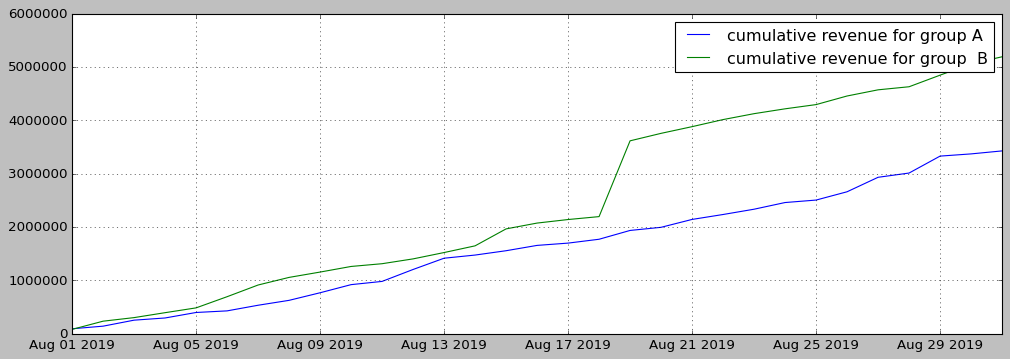

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('classic')
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='cumulative revenue for group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='cumulative revenue for group  B')
plt.grid()
plt.legend();

Выручка в группе B растет быстрее. Выручки обоих групп выравниваются 13 августа, и затем группа  А продолжает равномерно увеличиваться, а группа B имеет резкий скачок выручки на промежутке 2019-08-17 по 2019-08-21.
Рассмотрим внимательнее этот промежуток времени.

Group B revenue is growing faster. Revenue of both groups levelled off at 13 August, and then group A revenue increased gradually. Group B revenue sharply increased between 2019-08-17 and 2019-08-21.

In [28]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2137833,319
35,2019-08-18,2192694,327
37,2019-08-19,3613644,345
39,2019-08-20,3753932,363
41,2019-08-21,3879301,373


We can see that revenue has increased significantly at 19 August.

In [29]:
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


19 августа кто-то совершил крупную покупку - на  1294500 ед. Считаем это выбросом.

On August 19, someone made a large purchase - for 1294500 units. We consider it an outlier.

#### Average cumulative bill 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

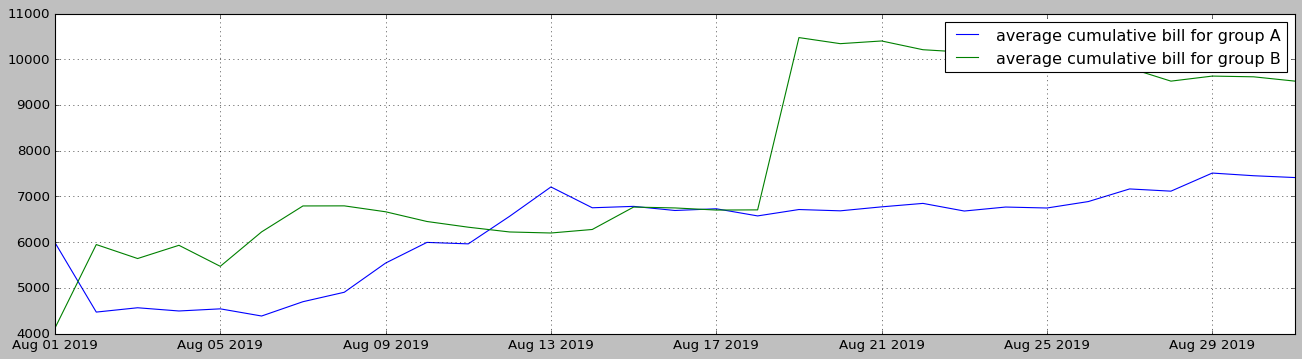

In [30]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='average cumulative bill for group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='average cumulative bill for group B')

plt.legend()

На графике также видно влияние заказа, сделанного 19 августа. Но средний чек группы B после 19 августа снижается, в отличие от графика выручки. Средний кумулятивный чек группы A  падает в начале месяца, затем наблюдаем рост в промежутке 2019-08-06 по 2019-08-13, с пиком 13 августа,далее держится примерно на одном уровне.

The graph shows the impact of the order made on August 19. But average bill for group B fell after August 19 as opposed to the revenue graph. Average bill for group A fell  at the beginning of the month then grows between 2019-08-06 and 2019-08-13 and reaches  a peak at August 13 and then levels of.

#### Relative difference of the average cumulative bill

Построим график относительного различия для среднего чека группы B к группе A.. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

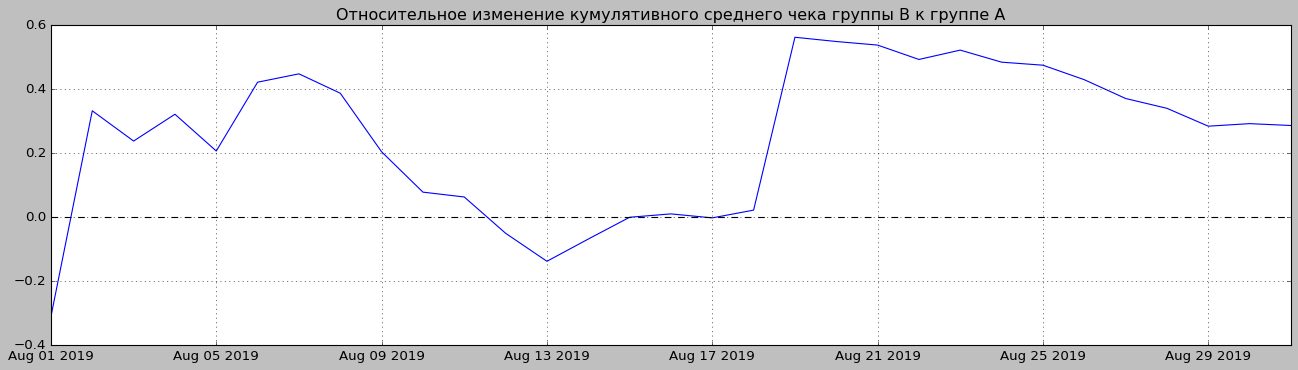

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет» аналогично график среднего куммулятивного чека. Это выбросы. Определим их чуть позже.

#### Cumulative conversion

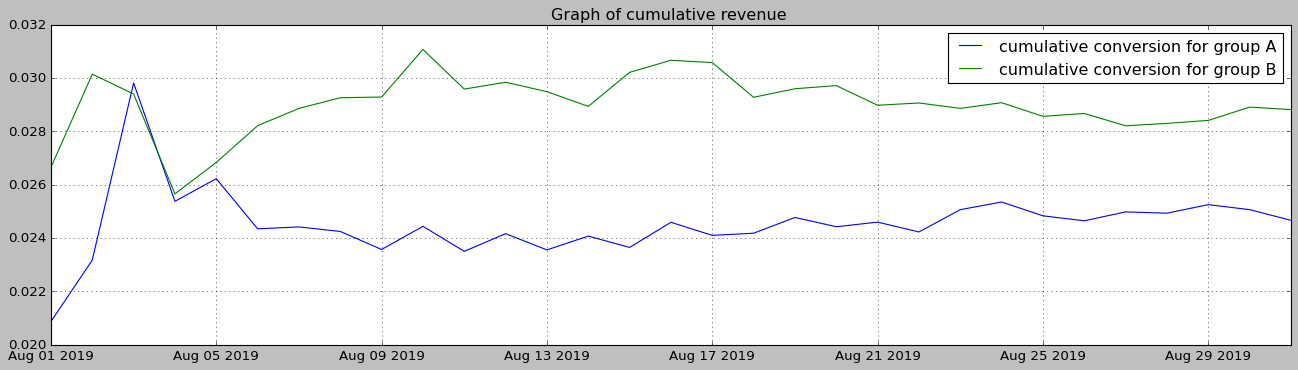

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='cumulative conversion for group A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='cumulative conversion for group B')
plt.title('Graph of cumulative revenue ')
plt.legend()


Cumulative conversion for group A rose at the beginning of the month and reaches peak at 2019-08-03 and then there is sharp dip at 2019-08-04. Cumulative conversion for group B  rose at the beginning, then fell sharply at 2019-08-04 as well. Then cumulative conversion for group B  rose again and reaches peak at 2019-08-10 and than levelled off.

Кумулятивная конверсия группы А растет в начеле месяца с пиком 2019-08-03 и дальше резкий спад 2019-08-04. Кумулятивная конверсия группы B в начале растет, затем резкий спад также 2019-08-04, затем снова рост с пиком в районе 2019-08-10 и далее график выравнивается.

#### Graph of relative change in cumulative conversion of group B to group A

Text(0.5, 1.0, 'Relative change in cumulative conversion of group B to group A')

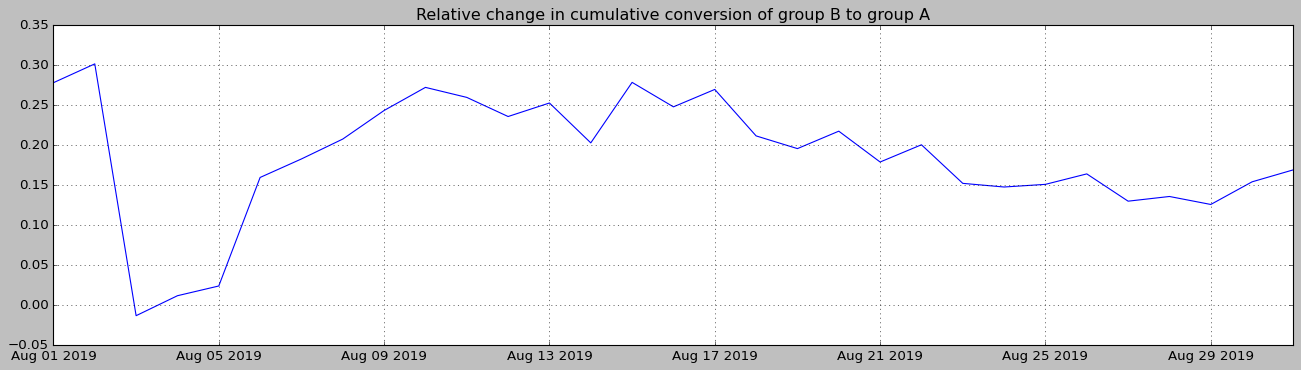

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Relative change in cumulative conversion of group B to group A')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но к концу августа постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.
С середины теста отличие конверсии группы B относительно конверсии группы A снижается и, возможно, уже стабилизировалось.

### Outliers and burst analysis: limit data values


#### Scatter plot of the number of orders by users

In [34]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [35]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head()

,user_id,orders
906,3972127743,2
225,963407295,2
929,4069496402,2
448,1959144690,2
50,232979603,2


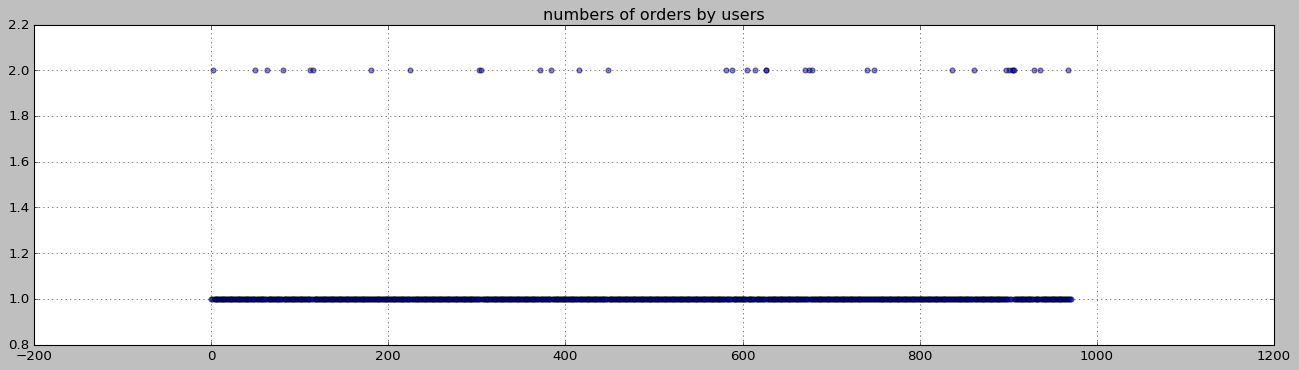

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,5))
plt.grid()
plt.title('numbers of orders by users')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

Most often, users make only 1 order. It is necessary to calculate the percentiles (95 and 99).

In [37]:
print('Calculate 95 and 99 percentiles by orders: ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Calculate 95 and 99 percentiles by orders:  [1. 2.]


In [38]:
print('Calculate percentiles from 95 to 99 percentiles : ', np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 

Calculate percentiles from 95 to 99 percentiles :  [1. 1. 2. 2. 2.]


Most users make 1 or 2 orders. It is necessary to filter out other values. These are anomalies.

#### Scatter plot of revenue from orders
We are plotting scatter plot of revenue from orders:

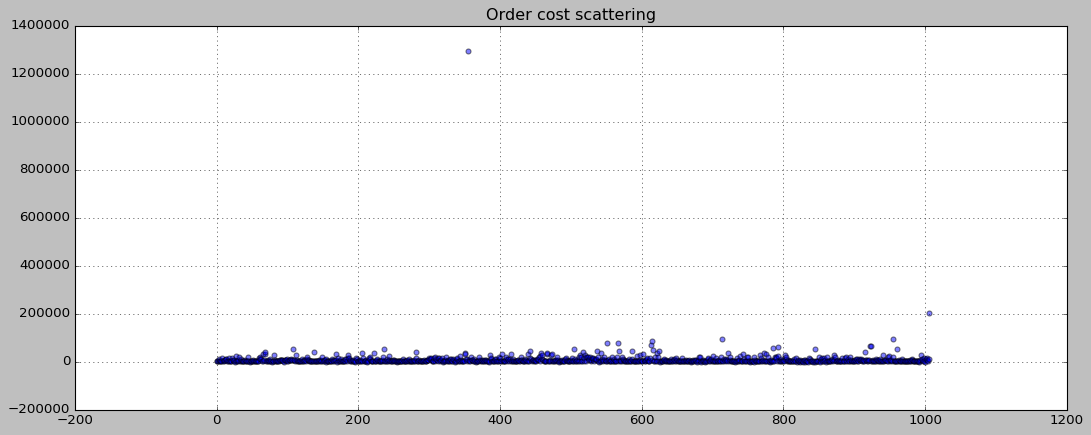

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(16,6))
plt.grid()
plt.title('Order cost scattering')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

The scatter plot shows one expensive orders in 19 August. This is outer. scatter plot is not informative with outlier. We are going to make query 'revenue' = 190000.

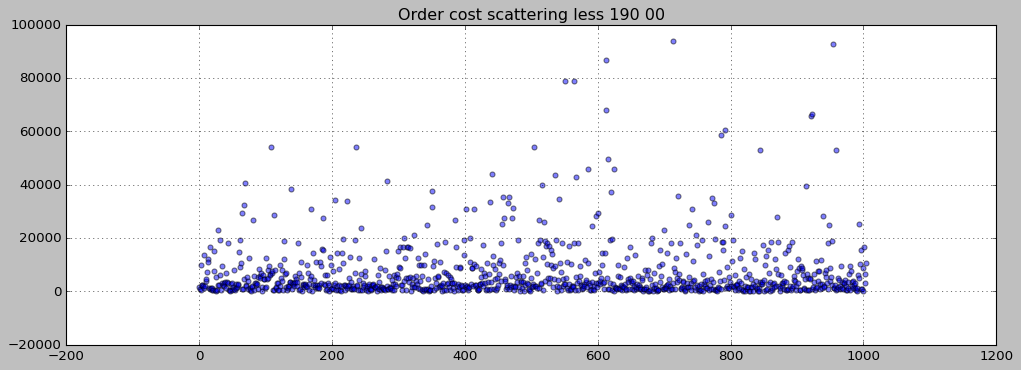

In [40]:
filtered_orders = orders[orders['revenue']<=190000]['revenue']
xn_values = pd.Series(range(0,len(filtered_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Order cost scattering less 190 00')
plt.scatter(xn_values, filtered_orders, alpha=0.5);

In [41]:
print('Calculate 95 and 99 percentiles for revenue : ', np.percentile(orders['revenue'], [95, 99])) 

Calculate 95 and 99 percentiles for revenue :  [28448. 60336.]


 Возьмем 60336 ед. на одного пользователя за нижнюю границу стоимости заказов.

60336 is bottom limit revenue of orders for user.

Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
Увидели выбросы и нашли границу для их определения.
Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

We have made visual evaluation of A/B test results and we can observe, that data much likely has an outliers. We found out the actual outliers as well as its thresholds.
We are going to calculate statistically significant difference of conversion and average bill between groups by raw data - without anomaly users deletions.

### Conversion

#### Conversion difference in groups on raw data

We are going to prepare data.

In [42]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [43]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
7,2019-08-08,14,91989,21,142901,127,622724,155,1052956,610,654,5239,5298
18,2019-08-19,19,165113,18,1420950,288,1933361,345,3613644,502,487,11629,11658
19,2019-08-20,10,58679,18,140288,298,1992040,363,3753932,575,560,12204,12218


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


We are calculating statistically significant difference in conversion between groups. We are defining dataframes ordersByUsersA and ordersByUsersB with columns ['userId', 'orders']. There we are going to put user data if this user made at least 1 order.

In [44]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

We are going to define 'sampleB' and 'sampleA' variables where we gonna store users and corresponded orders for each group. If certain user does not ever made any order, then we put zero. This is nessesary to prepare samples to verify Mann-Whitney creteria.

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**We form hypotheses:**

H₀ - There is no statistically significant difference for conversion between groups.

H1 -  difference is statistically significant

Critical level of significance(p) was taken equal to 0.05. If the p-value turns out to be less than it, we will reject the hypothesis.

In [46]:
alpha=0.05

In [47]:
results = stats.mannwhitneyu(sampleA, sampleB)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('null hypothesis is rejected: there is difference statistically significant')
else:
    print(
        'Failed to reject null hypothesis'
    ) 

p-value:  0.012508495640276614
null hypothesis is rejected: there is difference statistically significant


In [48]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.168


Relative difference between groups is 16,8%

#### Conversion difference in groups on filtered data

Отфильтруем данные по принятым границам выбросов и аномалий. Узнаем, сколько всего аномальных пользователей.

We are going to filter data according to defined outliers and anomalies thresholds.
Find out how many anomalous users there are.

In [49]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 60336]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей: " ,len(abnormalUsers)) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
Всего аномальных пользователей:  10


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

Figure out, how their actions affected on test results. We are going to calculate the statistical significance of differences in. We are going to  figure out orders count by user and test groups. We are going to prepare orders count by user and test groups.

In [50]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

**We form hypotheses:**

H₀ - There is no statistically significant difference for conversion between groups.

H1 - difference is statistically significant

Critical level of significance(p) was taken equal to 0.05. If the p-value turns out to be less than it, we will reject the hypothesis.

In [51]:
alpha=0.05

In [52]:
results_filt = stats.mannwhitneyu(sampleBFiltered, sampleAFiltered)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('null hypothesis is rejected: there is difference statistically significant')
else:
    print(
        'Failed to reject null hypothesis'
    ) 

p-value:  0.012508495640276614
null hypothesis is rejected: there is difference statistically significant


In [53]:
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.175


По очищенным данным также есть различия в конверсии групп A и B. Относительная разница между группами 17,5%

There is statistically significant difference between A and B for conversion according filtered data. The relative difference between the groups is 17.5%

###  Statistically significant difference in average bills of orders

#### Average bill difference in groups on raw data

In [54]:
orderA = orders[orders['group']=='A']

In [55]:
orderB = orders[orders['group']=='B']

**We form hypotheses:**

H₀ - There is no statistically significant difference between groups in average bills.

H1 -  difference is statistically significant



Critical level of significance(p) was taken equal to 0.05.
If the p-value turns out to be less than it, we will reject the hypothesis. 

In [56]:
alpha=0.05
results = stats.mannwhitneyu(orderA['revenue'], orderB['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('null hypothesis is rejected:  difference is statistically significant')
else:
    print(
        'Failed to reject null hypothesis, вывод о различии сделать нельзя'
    ) 

p-value:  0.8400834623963818
Failed to reject null hypothesis, вывод о различии сделать нельзя


In [57]:
print("{0:.3f}".format(orderB['revenue'].mean() / orderA['revenue'].mean() - 1))

0.285


According row data there are not  differences between group A and group B. The relative difference between the groups is 28.5% 

#### Average bill difference in groups on raw data.

In [58]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.966
0.025


Failed to reject null hypothesis.According raw data there are not differences between group A and group B. The relative difference between the groups is 2.5%
By raw data group B was better in terms of average bill by 28%. But now its better only by 2.5%. In the same time in those both cases, this difference is statistically insignificant.

## Summary

We should make a decision based on the results of the test. Solution options:

1.Stop the test, record the victory of one of the groups.

2.Stop the test, record no difference between groups.

3.Continue test. 

There is statistically significant difference between group conversion, either of raw data and after anomaly filtering.
There is no statistically significant difference of average bill between groups on raw as well as on filtered.
The graph shows conversion difference between groups.
The results of group B is better than group A. Group B has growing trends, or got fixed near the average value.

**The test results are pretty straightforward. So we can now decide to stop testing and accept the success of group B. Group B is much more efficient than A in terms of conversion, however, the average bill is approximatly same in both groups.**

Примем решение по результатам теста.
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.



Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

**Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать успех и победу группы B : группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.**